In [1]:
from scipy import misc, signal
import numpy as np
import matplotlib.pylab as plt
import cv2

In [2]:
# Path de la imagen original
imgPath = './input.jpg'

In [3]:
# """
# Esta funcion convierte una imagen a escala de grises
# """
def convertirEscalaGris(img):
    return (0.2989 * img[:,:,0] + 0.5870 * img[:,:,1] + 0.1140 * img[:,:,2])

def compararImagen(im1, im2, im3):
    plt.figure(figsize=(17,17))
    plt.subplot(131)
    plt.title('Img Original')
    plt.imshow(im1, cmap="gray")
    plt.axis("off")
    plt.subplot(132)
    plt.title('Img Transformada OpenCV')
    plt.imshow(im2, cmap="gray")
    plt.axis("off")
    plt.subplot(133)
    plt.title('Img Transformada ')
    plt.imshow(im2, cmap="gray")
    plt.axis("off")
    plt.show() 

In [4]:
def warpPerspective(img, H):
    # _img es una matrix de 0 y invH es la inversa de la matrix H
    _img, invH = np.zeros(img.shape), np.linalg.inv(H)
    
    # https://stackoverflow.com/questions/30499857/how-to-loop-through-2d-numpy-array-using-x-and-y-coordinates-without-getting-out
    for _r, _c in np.ndindex(img.shape):
        r, c, _ = invH.dot( np.array([_r, _c, 1]) ).astype(int)
        try:    _img[_r, _c] = img[r, c] if ((r >= 0 and c>=0) and (r<=img.shape[0] and c<=img.shape[1])) else 0
        except: pass
    return _img

c:\python27\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


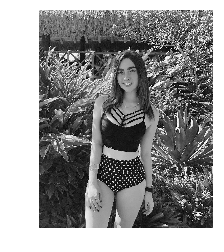

In [5]:
# Cargamos la imagen y la convertimos en escala de grises
img = convertirEscalaGris(misc.imread(imgPath))

# Mostramos la imagen que vamos a utilizar
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

# Traslación

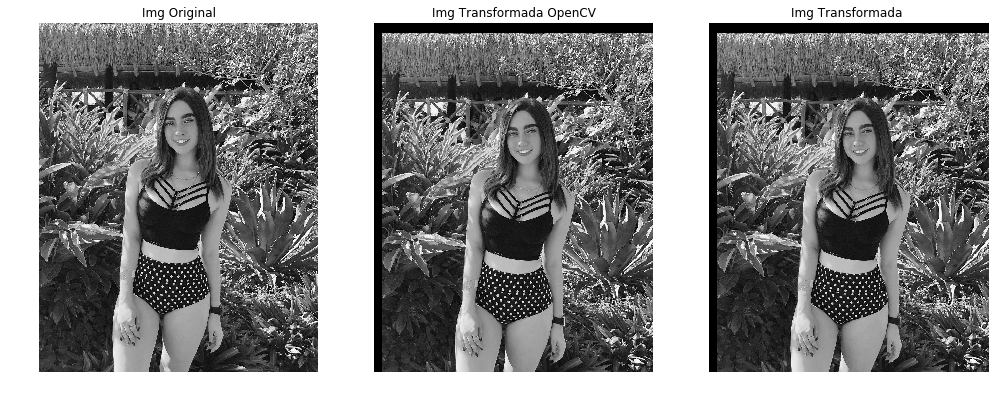

In [6]:
t = [30, 40]
H = np.array([[1, 0, t[0]], [0, 1, t[1]], [0, 0, 1]], dtype='f')

# OpenCV
imgT = cv2.warpPerspective(img, H, (img.shape[1],img.shape[0]))
# Mi version
imgTraslacion = warpPerspective(img, H)

compararImagen(img, imgT, imgTraslacion)

# Escalamiento

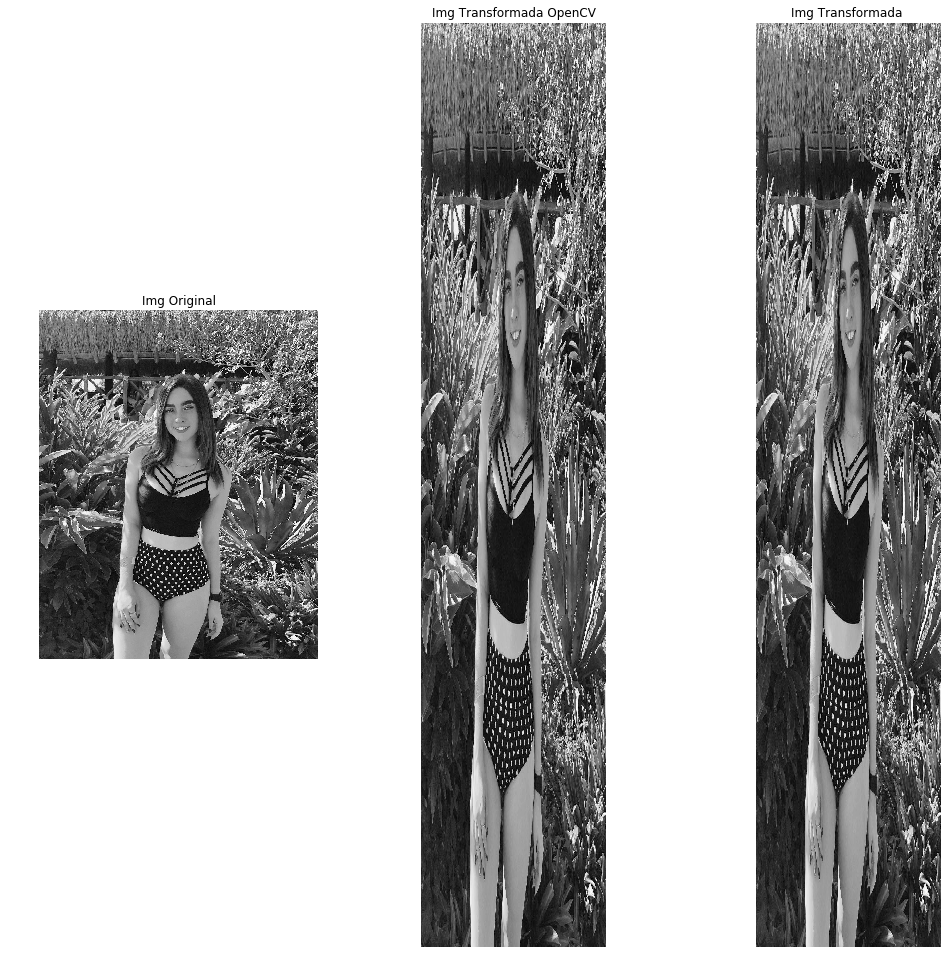

In [7]:
H = np.array([[0.5, 0, 0], [0, 2, 0], [0, 0, 1]], dtype='f')

# OpenCV
imgE = cv2.warpPerspective(img, H, (img.shape[1]/2,2*img.shape[0]))
# Mi version
imgEscalamiento = warpPerspective(img, H)

compararImagen(img, imgE, imgEscalamiento)

# Rotacion

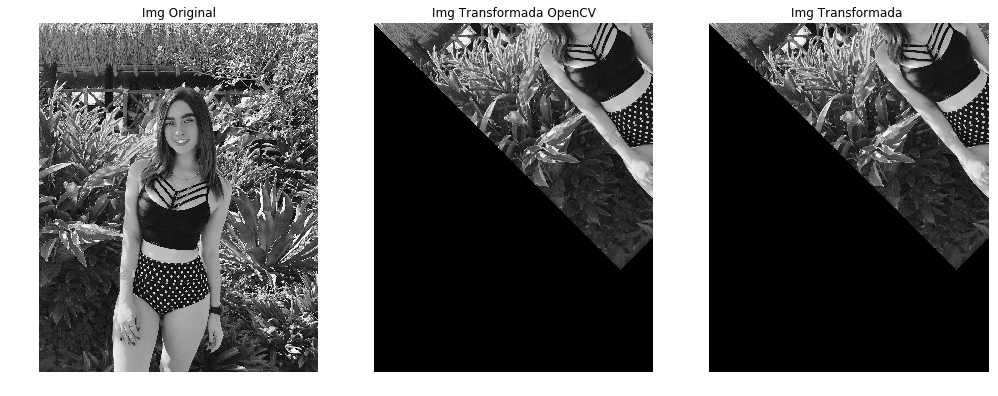

In [8]:
th = -45*np.pi/180.0
H = np.array([[np.cos(th), -np.sin(th), 0], [np.sin(th), np.cos(th), 0], [0, 0, 1]], dtype='f')

# OpenCV
imgR = cv2.warpPerspective(img, H, (img.shape[1], img.shape[0]))
# Mi version
imgRotacion = warpPerspective(img, H)

compararImagen(img, imgR, imgRotacion)

# Cizallamiento

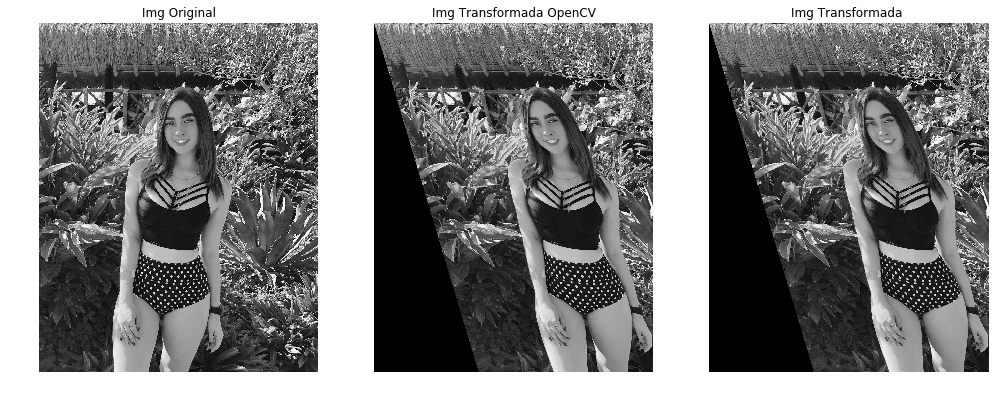

In [9]:
H = np.array([[1, 0.3, 0], [0, 1, 0], [0, 0, 1]], dtype='f')

# OpenCV
imgC = cv2.warpPerspective(img, H, (img.shape[1], img.shape[0]))
# Mi version
imgCizallamiento = warpPerspective(img, H)

compararImagen(img, imgC, imgCizallamiento)